In [1]:
import os
os.chdir('../../')

In [65]:
cd Python/Entropy_Learning/

data/  functions/  Notebooks/  reports/  src_(scripts)/


In [2]:
from functions.entropy_calculation import empirical_entropy
from functions.gallistel_information import gallistel_information
from functions.gallistel_information import reyes_cp
from functions.generate_pdf import generate_pdf, calculate_cs_us
from functions.matrix_to_df import matrix_to_df
from functions.bootstrap import shuffle_data
from functions.bootstrap import bootstrap
from functions.bootstrap import real_cp

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import io as spio
from scipy.stats import norm
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import seaborn as sns

sns.set_style('darkgrid')
plt.style.use('dark_background')
mpl.rc("figure", figsize=(10,6))
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.facecolor'] = (0,0,0,0)
mpl.rcParams['figure.facecolor'] = (1,1,1,0)
sns.set_palette('deep', color_codes=True)
#sns.choose_colorbrewer_palette('diverging')

In [5]:
names=['AB100' + str(n) + '.001.mat' if n<=9 
       else 'AB10' + str(n) + '.001.mat' for n in range(1,76)]

name_error = ['AB1031.001.mat']
#name_error = ['AB1029.002.mat', 'AB1031.002.mat', 'AB1075.002.mat'] session 2

for i in range(len(name_error)):
    names.remove(name_error[i])

all_rats = [matrix_to_df(spio.loadmat('data/raw/'+ name)['D']) for name in names]

In [8]:
for i in range(n_rats):
    if all_rats[i]['time_to_win'][0] > .9:
        print(i, all_rats[i]['time_to_win'][0], len(all_rats[i]))

22 0.9 179
24 0.9 211
26 0.9 304
27 0.9 7
28 1.2 2
30 1.2 2
33 0.9 595
37 0.9 633
55 0.9 163
62 1.2 846
63 1.2 473
64 1.2 562
65 1.2 580
66 1.2 648
67 1.2 456
68 1.1 566
69 1.1 920
70 1.1 617
71 1.1 514
72 1.1 670
73 1.1 63


In [9]:
n_rats = len(names)

#Selects rats with fixed time
fixed_time = [n for n in range(n_rats)
              #verifies if time is fixed
              if all_rats[n]['time_to_win'][0] >= .9 
              #verifies number of trials
              and len(all_rats[n]) >= 100]

n_rats_fixed = len(fixed_time)

In [10]:
fixed_time

[22, 24, 26, 33, 37, 55, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]

# Full Distributions

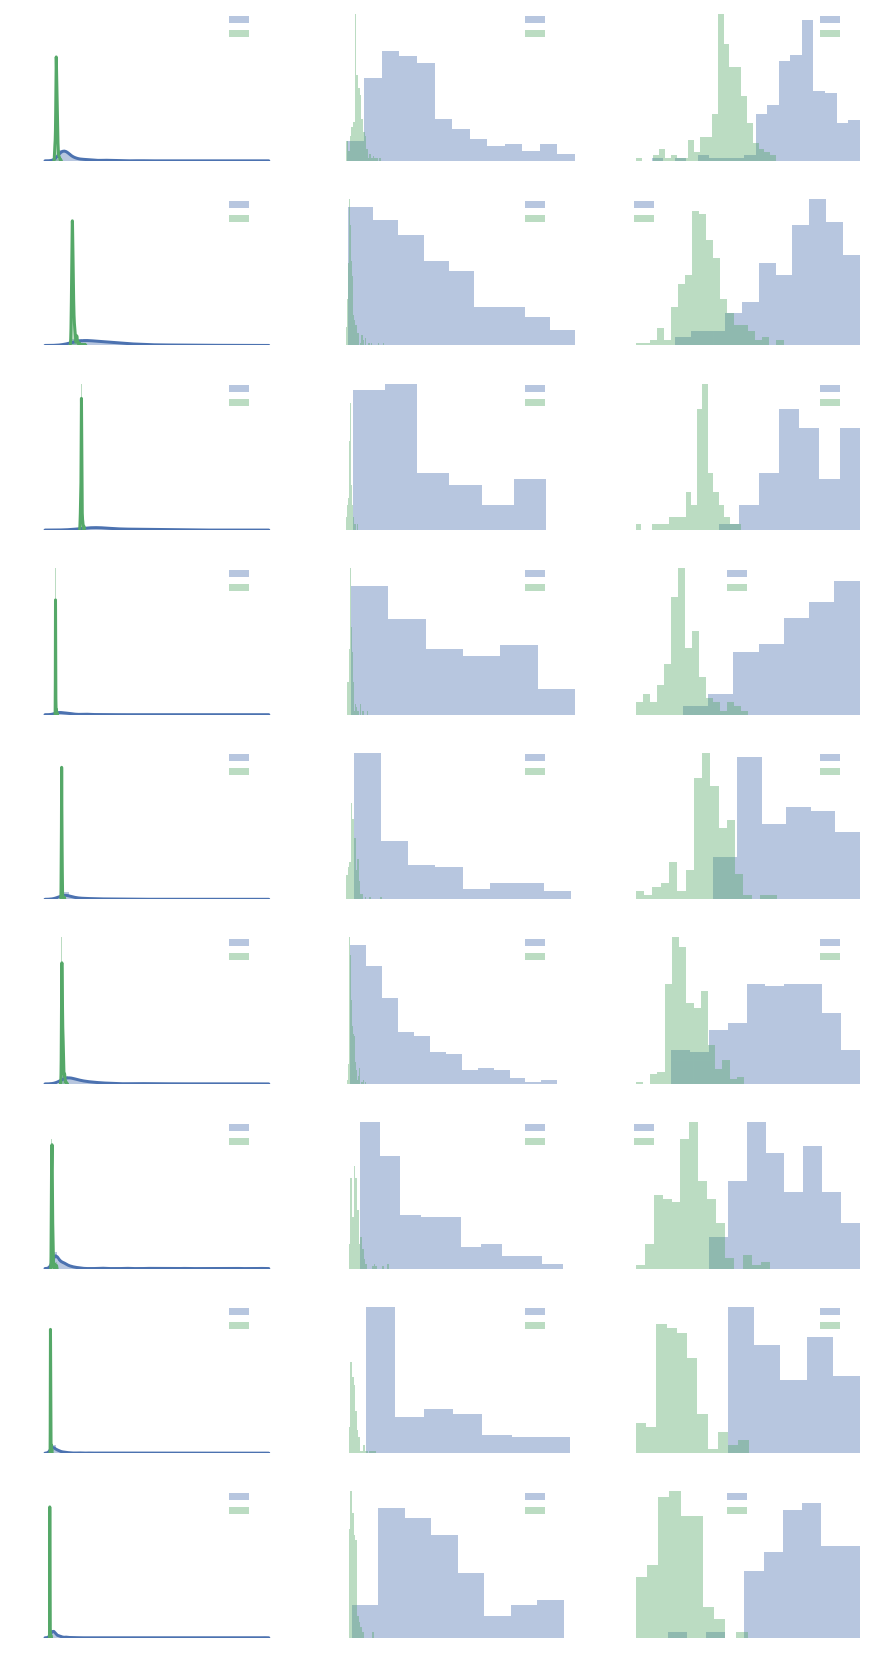

In [108]:
plt.figure(figsize=(15,30))
j=0
for i in range(n_rats_fixed):
    plt.subplot(n_rats_fixed, 3, 3*(j)+1)
    sns.distplot(US[i], kde=True, hist=True, label='US')
    sns.distplot(CS[i], kde=True, hist=True, label='CS')    
    plt.legend()
    
    plt.subplot(n_rats_fixed, 3, 3*(j+1)-1)
    sns.distplot(US[i][US[i]<=30], kde=False, hist=True, label='US')
    sns.distplot(CS[i][CS[i]<=30], kde=False, hist=True, label='CS')    
    plt.xlim(-2,30)
    plt.legend()
    
    plt.subplot(n_rats_fixed, 3, 3*(j+1))
    sns.distplot(np.log10(US[i][US[i]<=30]), kde=False, hist=True, label='US')
    sns.distplot(np.log10(CS[i][CS[i]<=30]), kde=False, hist=True, label='CS')    
    plt.legend()
    j += 1

## Bootstrap

In [25]:
#list of times ['t'] of fixed time rats
all_rats_fixed = [all_rats[i]['t'].values for i in fixed_time]
z = shuffle_data(all_rats_fixed, 1000)

In [26]:
#Don't try bootstrap if shuffle_data > 1000
z2= [bootstrap(z[i]) for i in range(n_rats_fixed)]

In [27]:
cp_cut = [real_cp(z2[i])[0] for i in range(n_rats_fixed)]

In [28]:
cp_cut

[1353.6684189764915,
 1918.7025214620073,
 4869.7712968507367,
 3430.4588428154125,
 52753.02801758259,
 1552.7332474469308,
 10287.487337394516,
 6924.4318843949459,
 5857.2445175590683,
 11322.586973332045,
 6688.1307969502359,
 1231.1753027205252,
 2881.1011403663356,
 21090.835467837966,
 11749.162542384936,
 4554.0824027289773,
 8588.1343901249093]

## Real change point (cut)

In [29]:
change_point = [reyes_cp(all_rats[i]['t'], 20) for i in fixed_time]

In [30]:
mean = [all_rats[i]['t'].rolling(window=20, center=True).mean() for i in fixed_time]

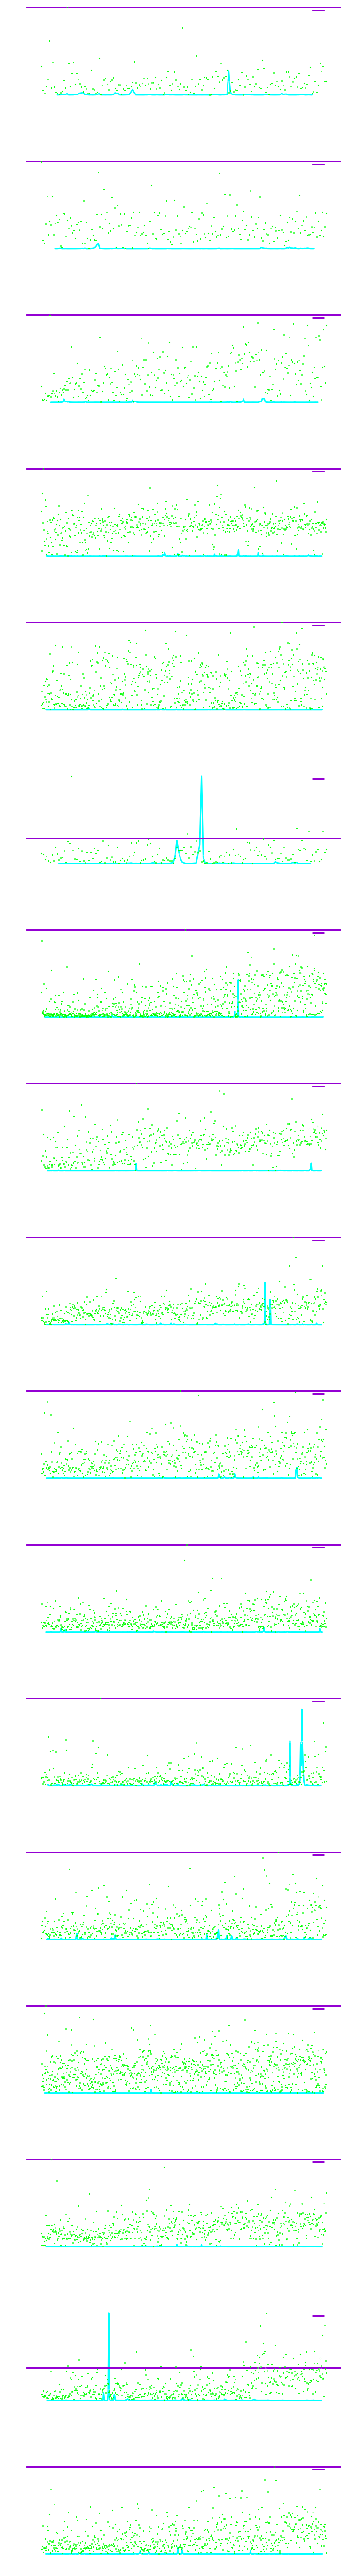

In [44]:
plt.figure(figsize=(12,100))

for i in range(n_rats_fixed):
    plt.subplot(n_rats_fixed, 1, i+1)
    plt.subplots_adjust(hspace=.6)
    x = np.arange(len(change_point[i]))
    y = change_point[i]
    plt.plot(x, change_point[i], color='aqua')
    aux = plt.axhline(cp_cut[i], linestyle ='-', color='darkviolet', label='.95')
    plt.legend(handles=[aux], loc=1, fontsize='medium')
    plt.ylabel('Change point value')
    x_label = 'Trials Rat ' + str(fixed_time[i])
    plt.xlabel(x_label, fontsize='medium')
    plt.twinx()
    plt.scatter(x, all_rats_fixed[i], s=8, alpha=1, color='lime')
    plt.ylabel('Time')
    plt.plot(x, mean[i], color='w', alpha=.3, label='moving average')
    plt.legend(loc=7, fontsize='medium')
    plt.grid()
    #plt.savefig('reports/figures/change_point_session1_v2')

# Partial Distribuitions

In [32]:
#Gets just rats with change point

#learned_rats = [6, 17, 19, 26, 31, 32, 34, 35, 44, 45, 57, 63, 64, 65]
learned_rats = [55, 71]
n_learned_rats = len(learned_rats)

learned_rats_cp = [reyes_cp(all_rats[i]['t'], 20) for i in learned_rats]

In [33]:
x = [calculate_cs_us(all_rats[i])for i in learned_rats]

In [34]:
CS = [x[i][0] for i in range(n_learned_rats)]
US = [x[i][1] for i in range(n_learned_rats)]


In [35]:
for i in range(n_learned_rats):
    #Gets number of trials until learning
    qtd_trials = np.argmax(learned_rats_cp[i])
    #Calculates cs entropy until trial of change point
    CS[i] = CS[i][:qtd_trials]
    #Same with us
    US[i] = US[i][:qtd_trials]
    

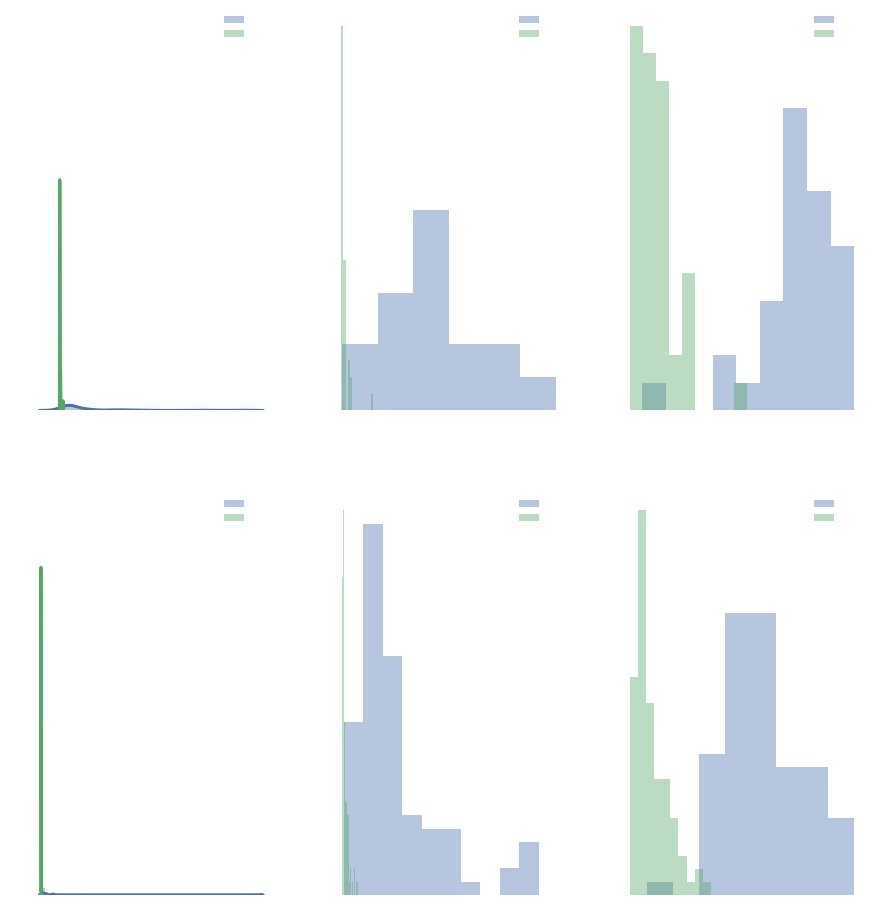

In [36]:
plt.figure(figsize=(15,150))
j=0
for i in range(n_learned_rats):
    plt.subplot(n_rats_fixed, 3, 3*(j)+1)
    sns.distplot(US[i], kde=True, hist=True, label='US')
    sns.distplot(CS[i], kde=True, hist=True, label='CS')    
    plt.legend()
    
    plt.subplot(n_rats_fixed, 3, 3*(j+1)-1)
    sns.distplot(US[i][US[i]<=40], kde=False, hist=True, label='US')
    sns.distplot(CS[i][CS[i]<=40], kde=False, hist=True, label='CS')    
    plt.xlim(-2,40)
    plt.legend()
    
    plt.subplot(n_rats_fixed, 3, 3*(j+1))
    sns.distplot(np.log10(US[i][US[i]<=40]), kde=False, hist=True, label='US')
    sns.distplot(np.log10(CS[i][CS[i]<=40]), kde=False, hist=True, label='CS')    
    plt.legend()
    j += 1

# Information

In [45]:
information = np.zeros(n_learned_rats)

for i in range(n_learned_rats):
    #Gets number of trials until learning
    qtd_trials = np.argmax(learned_rats_cp[i])
    #Calculates cs entropy until trial of change point
    cs_entropy = empirical_entropy(CS[i][:qtd_trials], (0, 40), .001)
    #Same with us
    us_entropy = empirical_entropy(US[i][:qtd_trials], (0, 40), .001)
    
    information[i] = us_entropy - cs_entropy

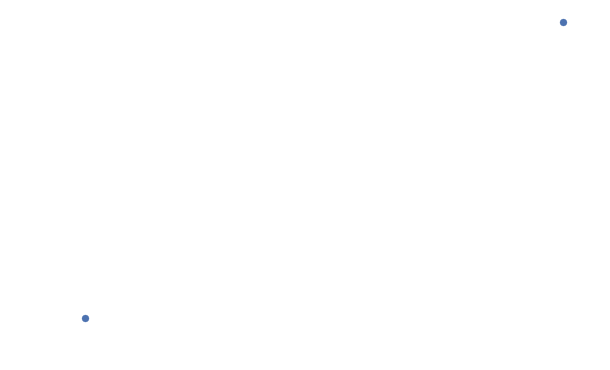

In [46]:
qtd_trials = [np.argmax(learned_rats_cp[i]) for i in range(n_learned_rats)]

plt.scatter(information, qtd_trials)
plt.xlabel('Information')
plt.ylabel('Trials')
    

## Codificacao logaritmica do tempo? 

In [ ]:
p  = np.random.normal(size=1000)
g =  np.random.normal(size=1000) + 10

sns.distplot(1.15**p)
sns.distplot(1.15**g)

## Validation Codes and Test

In [ ]:
#Validates unique's caracteristic of 'time to win' 

size = [len(all_rats[n]) for n in range(n_rats)]

for n in range (len(fixed_time)):
    print (len(all_rats[fixed_time[n]]))

In [ ]:
#validates shuffled data

test = shuffle_data(change_point, 1)

plt.figure(figsize = (8, 5))
for i in range(len(change_point)):
    plt.scatter(i, change_point[i].sum())
    plt.scatter(i, np.nansum(test[i]))

In [ ]:
#Validates real change point function

arr = [norm.rvs(size=1000), norm.rvs(size=500), norm.rvs(size=500)]

bins = 100
n_rats = len(arr)
p = .95

hist_y_bin_edges = [np.histogram(arr[i], bins, density=True) for i in range(n_rats)]

hist = [hist_y_bin_edges[i][0] for i in range(n_rats)]
bin_edges = [hist_y_bin_edges[i][1] for i in range(n_rats)]

print(len(bin_edges[2]))

area_sum = [0] * n_rats
real_cp1 = [0] * n_rats

for i in range(n_rats):
    max_min_diff = arr[i].max() - arr[i].min()
    
    dt = max_min_diff/bins
    for j in range(bins):
        if area_sum[i] <= p:
            area_sum[i] += hist[i][j] * dt
            real_cp1[i] = bin_edges[i][j+1]
            
            
print(area_sum[0], real_cp1[0])

In [ ]:
#Validades real_cp function bin X dt compatibility
dt = (arr[0].max()-arr[0].min())/bins
z7 = real_cp(arr, dt)
z7

In [ ]:
#Graphs output bootstrap (arr not cp_odds)

plt.figure(figsize=(15,20))

for i in range(9):
    plt.subplot(9, 1, i+1)
    x = np.arange(len(z2[i][0]))
    y = z2[i][0]
    std = np.std(z2[i][0])
    plt.plot(x, z2[i][0])
    #plt.scatter(x, array[i][0])'
    plt.axhline(std, linestyle ='-', color='g')

In [ ]:
#rats session 1 [24, 43, 62, 63, 64, 65, 66, 67, 68]

In [ ]:
#rats with cp

6, 17, 19, 26, 31, 32, 34, 35, 44, 45, [47], [56], 57, 63, 64, 65

In [98]:
#Old cell of rats selection by fixed(unique) time criteria
n_rats = len(names)

#Selects rats with fixed time
fixed_time = [n for n in range(n_rats)
              #verifies if time is fixed
              if len(np.unique(all_rats[n]['time_to_win'])) == 1 
              #verifies number of trials
              and len(all_rats[n]) >= 100]

n_rats_fixed = len(fixed_time)

In [37]:
#Change point values session2 (1k samples)
print(cp_cut)

[  2440.99800186   1298.97386069   9115.85090031   3365.72758968
   4807.61885453   7034.42304781  10048.38177392   7640.81405609
   8559.57019163   5273.32983939  22372.34045792   2533.21822145
  11580.10226138  18273.63003481  16174.07168174  30733.34288403
  13307.18022427  18235.79221997  13973.23119515   5212.38335298
   3986.04266855   2006.78257905   4507.5177813    4773.74544092
  16560.45288118  12327.94261038   4719.74011503   3752.22121155
   4428.45441183  22133.09302176   3437.50388907   4831.73131995
   9532.37485093  13184.83659833   5526.54193513   8823.99800224]


In [28]:
cp_cut

[1353.6684189764915,
 1918.7025214620073,
 4869.7712968507367,
 3430.4588428154125,
 52753.02801758259,
 1552.7332474469308,
 10287.487337394516,
 6924.4318843949459,
 5857.2445175590683,
 11322.586973332045,
 6688.1307969502359,
 1231.1753027205252,
 2881.1011403663356,
 21090.835467837966,
 11749.162542384936,
 4554.0824027289773,
 8588.1343901249093]